<a href="https://colab.research.google.com/github/GaborVxxx/ml_notes/blob/main/L2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch workflow

Explorean end-to-end workflow.

In [1]:
what_to_cover = {
    1: "data (prep and load)",
    2: "build model",
    3: "fitting the model to data (training)",
    4: "making predictions and evaluating a model (inference)",
    5: "saving and loading a model",
    6: "putting it all together"
}

what_to_cover

{1: 'data (prep and load)',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'making predictions and evaluating a model (inference)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [2]:
import torch
from torch import nn # nn contains all the lego pice for PyTorch neural network
import matplotlib.pyplot as plt

# Check verion
torch.__version__

'2.5.1+cu121'

# Data, prep and load

Data can be almost anything... in ML

* Excel spredsheet
* Images
* Videos
* Audio
* DNA data
* Text
...

Machine lerning is a game of two main parts:
1. Get data into numerical representation.
2. Build. amodel to learn patterns in that numerical data.

To showcase this, let's create some **known** data using the linear regression formula.
We'll use a linear regression formula to make a straight line with known **parameters**.

## Example for regression problems

A regression problem predicts numbers based on patterns in data. For example:

House prices: Predict how much a house costs based on its size and location.
* Weather: Predict tomorrow's temperature.
* Salary: Estimate a person's salary based on years of experience.

It’s like guessing a number based on clues!

# Linear regression

This is the equation of a straight line:

* Y: The value you want to predict (output).
* X: The input or feature (e.g., hours studied).
* a: The intercept (where the line crosses the Y-axis). AKA -> bias
* b: The slope (how much Y changes when X increases by 1). AKA -> wight

It shows the relationship between X and Y!
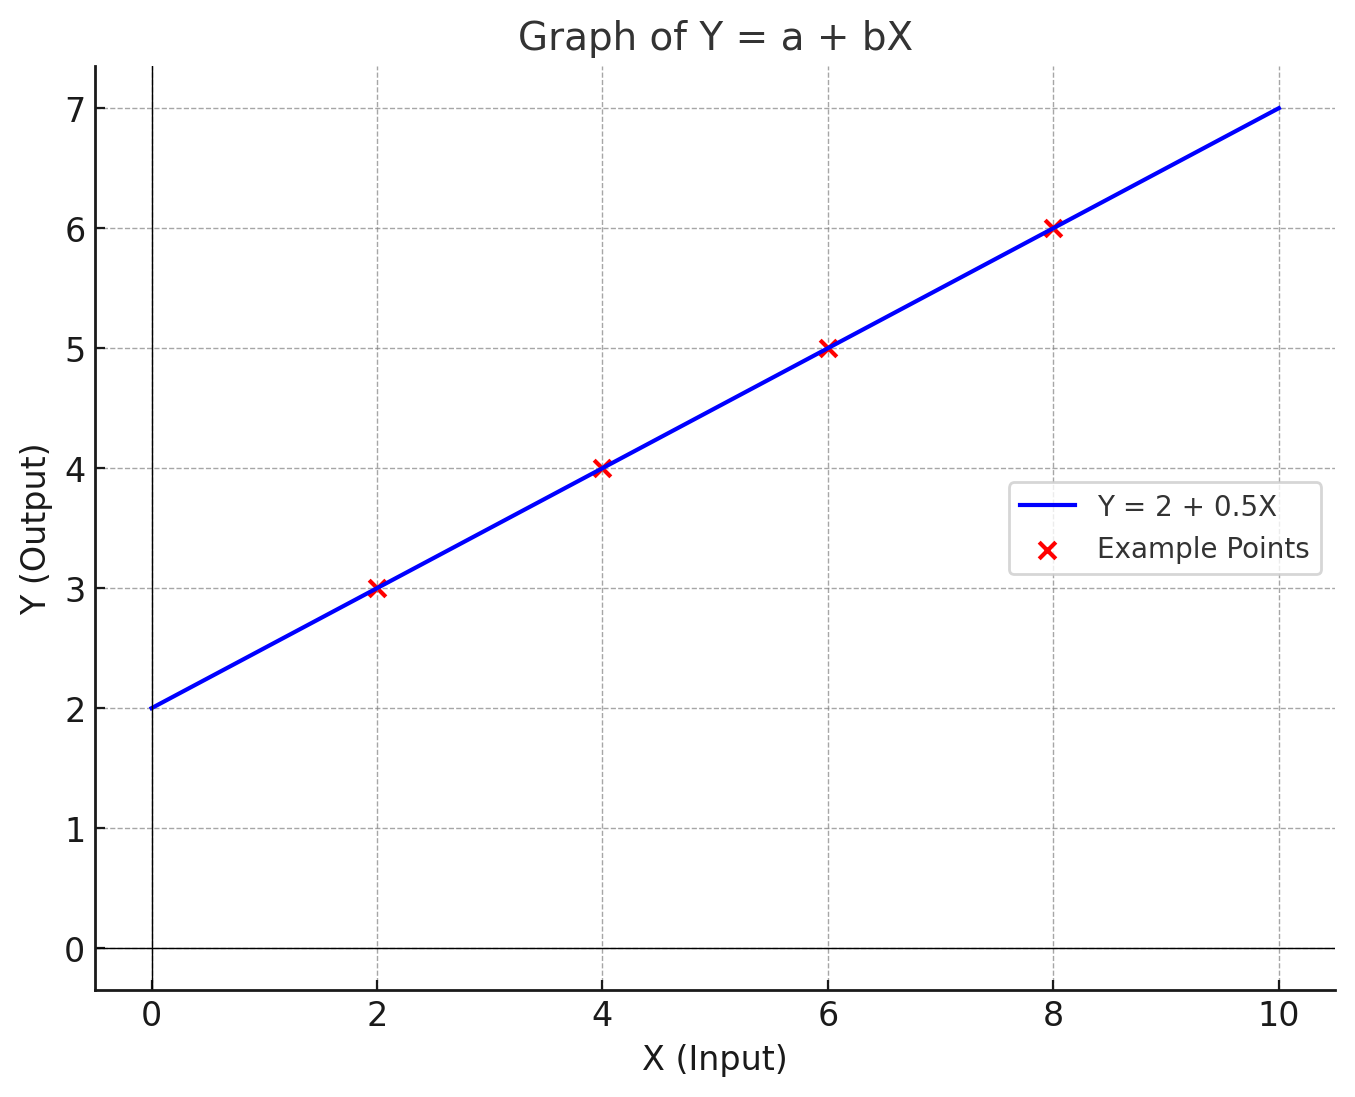

In [3]:
# Create the *known* parameters

weight = 0.7 # = b <-- the angle of the slope how step its climbing or declineing based on + or - number
bias = 0.3 # = a <-- the starting point where the line coross Y axis

# Create tensor

start = 0
end = 1
step = 0.02

# X represent: --> input feature, like each step "0.02" the value will increase with weight "0.7" this way creating a strait line that go upwards that crossing Y axis at "0.3" <- bias
X = torch.arange(start, end, step).unsqueeze(dim=1) # capital leter represent a matrix or a tensor (we create an array and add extra dimension to each element in it)
print(X.shape)
#print(X)

y = bias + weight * X  # lower case represent a vector, FORMULA: Y = a + bX ()

print(len(X), len(y))
X[:10], y[:10]

torch.Size([50, 1])
50 50


(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

# Spliting data in to training and test sets (one of the most important concept in ML)

We need to split our data in to 3 main set.
* Training set ~ roughly 60-80%
* Validation set ~ roughly 10-20% (`this is optional`)
* Test set ~ roughly 10-20%

We working on the model to generalise well. AKA -> The model to perform well on data it never see before.

In [5]:
# Create a train/test split

train_split = int(0.8 * len(X)) # 80% of data

X_train, y_train = X[:train_split], y[:train_split] # split X and y array from start-> to->80%
X_test, y_test = X[train_split:], y[train_split:] # split X and y array from->80% to->end

# How might we better visualize our data?

We use "matplotlib" for this.

In [7]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  # Are there predictions?
  if predictions is not None:
    # Plot it
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});


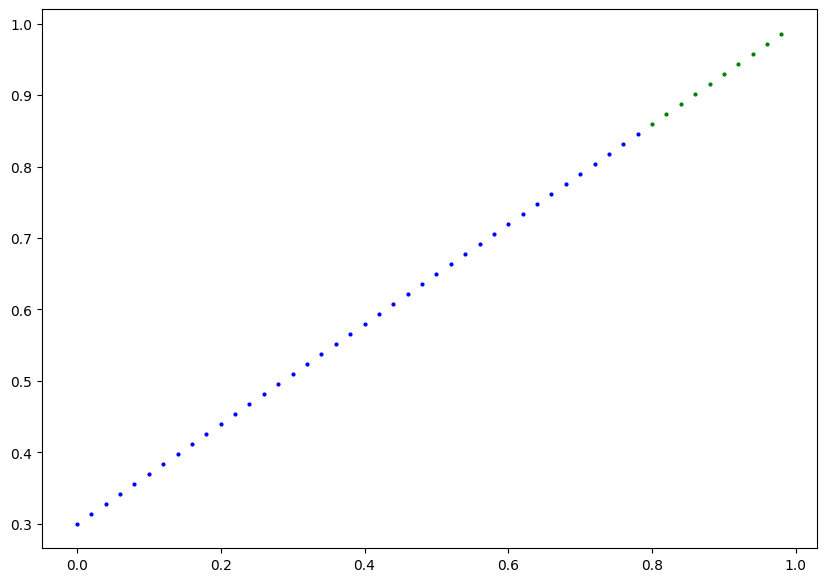

In [8]:
plot_predictions()

# Build a simple model for this problem

What the model do:
* Start with random values (weight and bias)
* Look at training data and adjust the random values to better represent (or get close to) the ideal values (the weight and bias values we used to create the data)

How does it do so?:
1. Gradient descent https://www.youtube.com/watch?v=IHZwWFHWa-w
2. Backpropagation


In [ ]:
# Create a linear regression model class

class LinearRegressionModelV1(nn.Module): # <-- amost everyting is coming from nn.Module
  def __init__(self):
    super().__init__()
    self.weight = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

    # Forward method to define the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor:  # <-- "x" is the input data
      return self.weight * x + self.bias